
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


In [87]:
#可視化などできていない部分が多くすみません。やってみたところまでで提出します。

In [16]:
import pandas as pd

In [17]:
income = pd.read_csv('Data/income_district.csv')
age = pd.read_csv('Data/h27_age_df.csv')
family = pd.read_csv('Data/h27_family_df.csv')
gender = pd.read_csv('Data/h27_gender_df2.csv')
house = pd.read_csv('Data/h27_house_df.csv')
house_info = pd.read_csv('Data/h27_house_info_df.csv')
industry = pd.read_csv('Data/h27_indusry_df.csv')
job = pd.read_csv('Data/h27_job_df.csv')
labor = pd.read_csv('Data/h27_labor_df.csv')
marriage = pd.read_csv('Data/h27_marriage_df.csv')
work_status = pd.read_csv('Data/h27_work_status_df.csv')

In [18]:
#変数の確認
display(income.head(),age.head(),family.head(),gender.head(),house.head(),house_info.head(),industry.head(),job.head(),labor.head(),marriage.head(),work_status.head())

,area_code,income_mean
0,13228,480.984419
1,43514,439.775281
2,23237,487.507769
3,18208,505.495103
4,12238,385.423846


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
1,45201,10.0,2,宮崎県,宮崎市,橘通西,NaN,32,56,61,...,35,47,43,44,20,16,9,5,3,1
2,45201,1001.0,3,宮崎県,宮崎市,橘通西,１丁目,9,6,11,...,15,15,16,14,7,7,4,3,-,-
3,45201,1002.0,3,宮崎県,宮崎市,橘通西,２丁目,2,10,18,...,4,10,11,14,2,2,3,1,3,1
4,45201,1003.0,3,宮崎県,宮崎市,橘通西,３丁目,-,1,-,...,1,-,-,2,-,1,-,-,-,-


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,family_count,family_member_count,general_family_count,member_1,member_2,member_3,member_4,member_5,member_6,member_7
0,25201,NaN,1,滋賀県,大津市,NaN,NaN,136153,340973,135957,39153,39186,25980,22117,7034,1830,657
1,25201,10.0,2,滋賀県,大津市,葛川坂下町,NaN,19,38,19,8,7,1,2,1,-,-
2,25201,20.0,2,滋賀県,大津市,葛川木戸口町,NaN,10,17,10,5,4,-,1,-,-,-
3,25201,30.0,2,滋賀県,大津市,葛川中村町,NaN,15,31,15,7,4,3,-,-,-,1
4,25201,40.0,2,滋賀県,大津市,葛川坊村町,NaN,22,38,22,11,8,1,2,-,-,-


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,population,male_population,female_population,family_count
0,18201,NaN,1,福井県,福井市,NaN,NaN,265904,128892,137012,99872
1,18201,10.0,2,福井県,福井市,明里町,NaN,386,191,195,193
2,18201,30.0,2,福井県,福井市,足谷町,NaN,X,X,X,X
3,18201,40.0,2,福井県,福井市,足羽,NaN,2881,1382,1499,1178
4,18201,4001.0,3,福井県,福井市,足羽,１丁目,771,375,396,314


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,family_house,own_house_family,public_rent_family,private_rent_family,salary_rent_family,room_rent_family,other_house_family,own_house_individual,public_rent_individual,private_rent_individual,salary_rent_individual,room_rent_individual,other_house_individual
0,25201,NaN,1,滋賀県,大津市,NaN,NaN,135957,97948,5183,27685,2501,777,1856,269022,9676,46261,5570,1585,2746
1,25201,10.0,2,滋賀県,大津市,葛川坂下町,NaN,19,19,-,-,-,-,-,38,-,-,-,-,-
2,25201,20.0,2,滋賀県,大津市,葛川木戸口町,NaN,10,10,-,-,-,-,-,17,-,-,-,-,-
3,25201,30.0,2,滋賀県,大津市,葛川中村町,NaN,15,14,-,-,1,-,-,30,-,-,1,-,-
4,25201,40.0,2,滋賀県,大津市,葛川坊村町,NaN,22,17,-,-,2,-,3,31,-,-,4,-,3


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,single_house_family,long_house_family,share_house_family,...,3-5floor_family,6-10floor_family,11floor_family,single_house_individual,long_house_individual,share_house_individual,1-2floor_individual,3-5floor_individual,6-10floor_individual,11floor_individual
0,27102,NaN,1,大阪府,大阪市都島区,NaN,NaN,9431,954,40447,...,9030,13457,16915,23379,1773,76699,1400,14645,21284,39370
1,27102,10.0,2,大阪府,大阪市都島区,片町,NaN,84,3,1342,...,166,896,276,202,8,1800,4,219,1152,425
2,27102,1001.0,3,大阪府,大阪市都島区,片町,１丁目,50,1,905,...,119,586,196,129,4,1242,4,135,763,340
3,27102,1002.0,3,大阪府,大阪市都島区,片町,２丁目,34,2,437,...,47,310,80,73,4,558,-,84,389,85
4,27102,20.0,2,大阪府,大阪市都島区,網島町,NaN,38,4,705,...,25,493,187,89,5,1188,-,36,768,384


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_agriculture_forestry_male,agriculture_male,B_fishing_male,...,K_real_estate_female,L_academic_female,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female
0,43101,NaN,1,熊本県,熊本市中央区,NaN,NaN,306,264,6,...,1127,1335,3898,2150,3058,9432,275,2841,1391,1989
1,43101,10.0,2,熊本県,熊本市中央区,安政町,NaN,-,-,-,...,3,-,4,2,-,2,-,2,-,1
2,43101,20.0,2,熊本県,熊本市中央区,井川淵町,NaN,-,-,-,...,2,1,4,2,5,6,-,2,2,1
3,43101,31.0,2,熊本県,熊本市中央区,出水,NaN,33,32,-,...,75,99,223,132,240,777,20,201,93,108
4,43101,3101.0,3,熊本県,熊本市中央区,出水,１丁目,-,-,-,...,11,10,21,15,21,62,2,19,10,10


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_administrative_male,B_professional_workers_male,C_office_workers_male,...,C_office_workers_female,D_sales_workers_female,E_service_workers_female,F_safety_workers_female,G_agriculture_workers_female,H_production_workers_female,I_transport_workers_female,J_construction_workers_female,K_cleaning_workers_female,L_other_wokers_female
0,13101,NaN,1,東京都,千代田区,NaN,NaN,1391,3359,2438,...,3291,1127,1023,65,1,235,8,16,192,1823
1,13101,10.0,2,東京都,千代田区,丸の内,NaN,X,X,X,...,X,X,X,X,X,X,X,X,X,X
2,13101,1001.0,3,東京都,千代田区,丸の内,１丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
3,13101,1002.0,3,東京都,千代田区,丸の内,２丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
4,13101,1003.0,3,東京都,千代田区,丸の内,３丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,NaN,1,愛知県,名古屋市千種区,NaN,NaN,45761,15806,33891,32964
1,23101,10.0,2,愛知県,名古屋市千種区,青柳町,NaN,262,86,197,175
2,23101,1005.0,3,愛知県,名古屋市千種区,青柳町,５丁目,33,12,24,26
3,23101,1006.0,3,愛知県,名古屋市千種区,青柳町,６丁目,113,27,82,64
4,23101,1007.0,3,愛知県,名古屋市千種区,青柳町,７丁目,116,47,91,85


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,unmarried,married,divorced,unmarried_male,married_male,divorced_male,unmarried_female,married_female,divorced_female
0,39201,NaN,1,高知県,高知市,NaN,NaN,76365,153847,47056,38837,76315,11447,37528,77532,35609
1,39201,10.0,2,高知県,高知市,上町,NaN,864,1268,634,409,654,115,455,614,519
2,39201,1001.0,3,高知県,高知市,上町,１丁目,248,409,201,105,218,33,143,191,168
3,39201,1002.0,3,高知県,高知市,上町,２丁目,148,175,74,69,85,9,79,90,65
4,39201,1003.0,3,高知県,高知市,上町,３丁目,203,330,171,96,169,34,107,161,137


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,employer_male,self_employed_male,family_work_male,unkonwn_status_male,employer_female,self_employed_female,family_work_female,unkonwn_status_female
0,37201,NaN,1,香川県,高松市,NaN,NaN,91038,11731,957,2525,75462,3823,4209,1684
1,37201,10.0,2,香川県,高松市,塩屋町,NaN,30,7,1,-,26,2,3,1
2,37201,20.0,2,香川県,高松市,築地町,NaN,144,25,2,11,116,16,9,2
3,37201,30.0,2,香川県,高松市,塩上町,NaN,284,53,6,13,212,24,16,11
4,37201,3000.0,3,香川県,高松市,塩上町,NaN,14,5,1,-,16,2,2,2


In [19]:
display(marriage.head())

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,unmarried,married,divorced,unmarried_male,married_male,divorced_male,unmarried_female,married_female,divorced_female
0,39201,NaN,1,高知県,高知市,NaN,NaN,76365,153847,47056,38837,76315,11447,37528,77532,35609
1,39201,10.0,2,高知県,高知市,上町,NaN,864,1268,634,409,654,115,455,614,519
2,39201,1001.0,3,高知県,高知市,上町,１丁目,248,409,201,105,218,33,143,191,168
3,39201,1002.0,3,高知県,高知市,上町,２丁目,148,175,74,69,85,9,79,90,65
4,39201,1003.0,3,高知県,高知市,上町,３丁目,203,330,171,96,169,34,107,161,137


In [20]:
#変数の加工
marriage1=marriage[marriage["district2_id"].isna()]
marriage2=marriage1.drop(columns=["district2_id","level_identifier","state_name","city_name","district_name","district2_name",
                                  "unmarried","married","divorced"])
merged1 = pd.merge(income, marriage2, how='outer',
                  left_on='area_code', right_on='district_id')
merged2=merged1.replace('-', np.nan, inplace=False)
merged2

,area_code,income_mean,district_id,unmarried_male,married_male,divorced_male,unmarried_female,married_female,divorced_female
0,1101.0,449.979373,1101.0,32257,49601,6033,39837,50252,20645
1,1102.0,395.847532,1102.0,37950,65541,7972,35976,67438,25096
2,1103.0,404.742547,1103.0,34932,59707,8879,32405,61542,24071
3,1104.0,385.278248,1104.0,28100,46700,7263,27114,47602,19778
4,1105.0,397.451303,1105.0,29337,49076,6543,30654,50640,20393
...,...,...,...,...,...,...,...,...,...
1898,NaN,NaN,47361.0,1208,1829,398,595,1674,808
1899,47362.0,352.510684,47362.0,4022,6513,888,3163,6592,2351
1900,NaN,NaN,47375.0,163,300,69,78,269,107
1901,NaN,NaN,47381.0,533,931,161,459,834,267


In [31]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 960.0 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.2/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.0 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.0 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/11.0 MB 1.7 MB/s eta 0:00:07
   --

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
merged2.head()

,area_code,income_mean,district_id,unmarried_male,married_male,divorced_male,unmarried_female,married_female,divorced_female
0,1101.0,449.979373,1101.0,32257,49601,6033,39837,50252,20645
1,1102.0,395.847532,1102.0,37950,65541,7972,35976,67438,25096
2,1103.0,404.742547,1103.0,34932,59707,8879,32405,61542,24071
3,1104.0,385.278248,1104.0,28100,46700,7263,27114,47602,19778
4,1105.0,397.451303,1105.0,29337,49076,6543,30654,50640,20393


In [23]:
#欠損地の処理
merged2[["income_mean","unmarried_male","married_male","divorced_male",
        "unmarried_female","married_female","divorced_female"]]=imputer.fit_transform(merged2[["income_mean","unmarried_male","married_male","divorced_male","unmarried_female","married_female","divorced_female"]])
merged2

,area_code,income_mean,district_id,unmarried_male,married_male,divorced_male,unmarried_female,married_female,divorced_female
0,1101.0,449.979373,1101.0,32257.0,49601.0,6033.0,39837.0,50252.0,20645.0
1,1102.0,395.847532,1102.0,37950.0,65541.0,7972.0,35976.0,67438.0,25096.0
2,1103.0,404.742547,1103.0,34932.0,59707.0,8879.0,32405.0,61542.0,24071.0
3,1104.0,385.278248,1104.0,28100.0,46700.0,7263.0,27114.0,47602.0,19778.0
4,1105.0,397.451303,1105.0,29337.0,49076.0,6543.0,30654.0,50640.0,20393.0
...,...,...,...,...,...,...,...,...,...
1898,NaN,453.735961,47361.0,1208.0,1829.0,398.0,595.0,1674.0,808.0
1899,47362.0,352.510684,47362.0,4022.0,6513.0,888.0,3163.0,6592.0,2351.0
1900,NaN,453.735961,47375.0,163.0,300.0,69.0,78.0,269.0,107.0
1901,NaN,453.735961,47381.0,533.0,931.0,161.0,459.0,834.0,267.0


In [24]:
#スケーリング
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scatterd_income_mean=scaler.fit_transform(merged2[["income_mean"]])
scatterd_unmarried_male=scaler.fit_transform(merged2[["unmarried_male"]])
scatterd_married_male=scaler.fit_transform(merged2[["married_male"]])
scatterd_divorced_male=scaler.fit_transform(merged2[["divorced_male"]])
scatterd_unmarried_female=scaler.fit_transform(merged2[["unmarried_female"]])
scatterd_married_female=scaler.fit_transform(merged2[["married_female"]])
scatterd_divorced_female=scaler.fit_transform(merged2[["divorced_female"]])
display(scatterd_unmarried_male,scatterd_income_mean)

array([[0.29290975],
       [0.34461307],
       [0.31720386],
       ...,
       [0.00143494],
       [0.00479525],
       [0.00298795]])

array([[0.41623812],
       [0.29952462],
       [0.31870314],
       ...,
       [0.42433769],
       [0.42433769],
       [0.42433769]])

In [13]:
import numpy as np

In [25]:
merged3 = np.column_stack((scatterd_unmarried_male,scatterd_unmarried_female,scatterd_income_mean))
merged3

array([[0.29290975, 0.3452254 , 0.41623812],
       [0.34461307, 0.31175945, 0.29952462],
       [0.31720386, 0.28080714, 0.31870314],
       ...,
       [0.00143494, 0.00060674, 0.42433769],
       [0.00479525, 0.00390913, 0.42433769],
       [0.00298795, 0.00078009, 0.42433769]])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
#データ分け
X = merged3[:, :2]  
y = merged3[:, 2]  
len(X) == len(y)

True

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# モデルの評価
print('testing score:', r2_score(y_test, y_pred))

testing score: 0.037148969940456245


In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth = 10).fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)
print('testing score:', r2_score(y_test, y_pred))

testing score: -0.2365186245219948


In [37]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 825.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 655.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 778.5 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/294.9 kB 798.5 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 850.1 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 886.2 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 867.9 kB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
# 3次元プロットを作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

labor_male = merged2[:,0]
labor_female = merged2[:,1]
income_mean =  merged2[:,2]
# 3D散布図を描画
ax.scatter(labor_male,labor_female, income_mean)

# プロットのラベルを設定
ax.set_xlabel("labor_male")
ax.set_ylabel("labor_female")
ax.set_zlabel("income_mean")

# プロットを表示
plt.show()

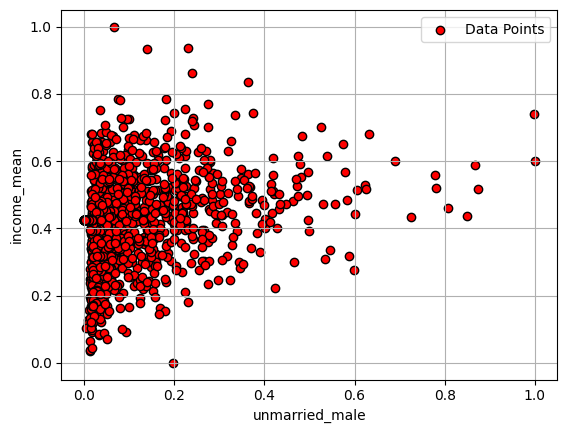

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# データの生成
unmarried_male = merged3[:,0]
income_mean = merged3[:,2]

# 散布図の作成
plt.scatter(unmarried_male, income_mean, c='r', label='Data Points', edgecolors='k')

# ラベル
plt.xlabel('unmarried_male')
plt.ylabel('income_mean')

# 凡例とグリッド
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()


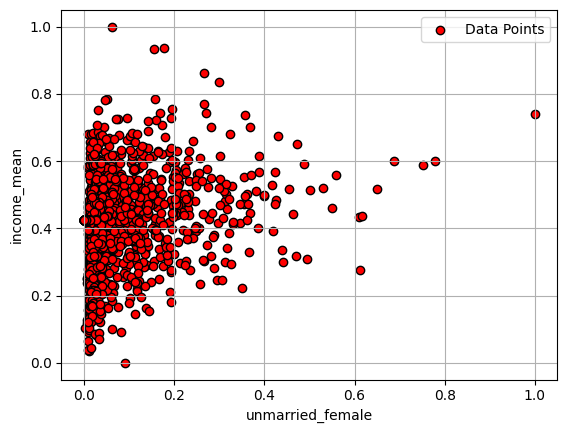

In [51]:
# データの生成
unmarried_female = merged3[:,1]
income_mean = merged3[:,2]

# 散布図の作成
plt.scatter(unmarried_female, income_mean, c='r', label='Data Points', edgecolors='k')

# ラベル
plt.xlabel('unmarried_female')
plt.ylabel('income_mean')

# 凡例とグリッド
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()
